In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas
import seaborn

%matplotlib inline
plt.rcParams['savefig.format'] = 'png'

In [4]:
BASE_DATASET = "Erdös-Rényi"


dataset_name = None
if BASE_DATASET == "Erdös-Rényi":
    dataset_name = "er"
elif BASE_DATASET == "AQSOL":
    dataset_name = "aqsol"
elif BASE_DATASET == "PCQM4Mv2":
    dataset_name = "pcqm4mv2"
elif BASE_DATASET == "OGBN-Arxiv":
    dataset_name = "ogbn-arxiv"
elif BASE_DATASET == "CoraFull":
    dataset_name = "corafull"

df = pandas.concat([pandas.read_csv(f"../results/run-{i}/{dataset_name}.csv").sort_values("Name").dropna(subset = "model") for i in range(8)])

In [9]:
def path_to_noise(path: str) -> float:
    if "0.04" in path:
        return 0.04
    elif "0.06" in path:
        return 0.06
    elif "0.08" in path:
        return 0.08
    elif "0.12" in path:
        return 0.12
    elif "0.15" in path:
        return 0.15
    elif "0.18" in path:
        return 0.18
    elif "0.24" in path:
        return 0.24
    elif "0.3" in path:
        return 0.30

Index(['Start Time', 'Duration', 'Run ID', 'Name', 'Source Type',
       'Source Name', 'User', 'Status', 'batch_size', 'cuda', 'custom_model',
       'dataset', 'end_factor', 'epochs', 'experiment', 'features',
       'grad_clip', 'heads', 'layers', 'log_frequency', 'lr', 'max_lr',
       'model', 'nb_params', 'optimizer', 'out_features', 'profile',
       'run_name', 'start_factor', 'lap/train', 'lap/val', 'learning_rate',
       'log_time', 'loss/train', 'loss/val', 'minibatch_loss',
       'system/cpu_utilization_percentage', 'system/disk_available_megabytes',
       'system/disk_usage_megabytes', 'system/disk_usage_percentage',
       'system/network_receive_megabytes', 'system/network_transmit_megabytes',
       'system/system_memory_usage_megabytes',
       'system/system_memory_usage_percentage', 'top_1/train', 'top_1/val',
       'top_3/train', 'top_3/val', 'top_5/train', 'top_5/val', 'train_time'],
      dtype='object')

In [20]:
df.groupby(["model","dataset"])["lap/val"].median()
df.groupby(["model","dataset"])["lap/val"].quantile(0.90)
df.groupby(["model","dataset"])["lap/val"].quantile(0.10)
df.groupby(["model","dataset"])["lap/val"].max()
df.groupby(["model","dataset"])["lap/val"].min()


model     dataset                                   
GAT       /scratch/jlagesse/ngmb-data/ER[100,8,0.04]    0.99710
          /scratch/jlagesse/ngmb-data/ER[100,8,0.06]    0.98322
          /scratch/jlagesse/ngmb-data/ER[100,8,0.08]    0.92392
          /scratch/jlagesse/ngmb-data/ER[100,8,0.12]    0.65350
          /scratch/jlagesse/ngmb-data/ER[100,8,0.15]    0.46624
          /scratch/jlagesse/ngmb-data/ER[100,8,0.18]    0.31626
          /scratch/jlagesse/ngmb-data/ER[100,8,0.24]    0.13824
          /scratch/jlagesse/ngmb-data/ER[100,8,0.3]     0.07568
GATv2     /scratch/jlagesse/ngmb-data/ER[100,8,0.04]    0.99608
          /scratch/jlagesse/ngmb-data/ER[100,8,0.06]    0.98234
          /scratch/jlagesse/ngmb-data/ER[100,8,0.08]    0.92608
          /scratch/jlagesse/ngmb-data/ER[100,8,0.12]    0.65064
          /scratch/jlagesse/ngmb-data/ER[100,8,0.15]    0.46384
          /scratch/jlagesse/ngmb-data/ER[100,8,0.18]    0.31442
          /scratch/jlagesse/ngmb-data/ER[100,8,0.24

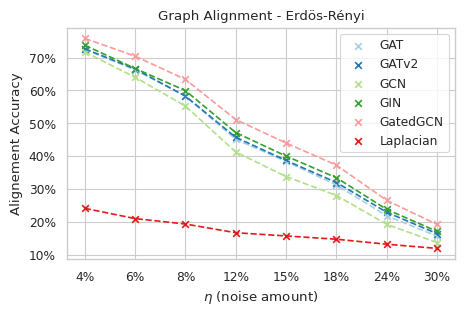

In [71]:
seaborn.set_palette('Paired')
seaborn.set_style('whitegrid')
seaborn.set_context("paper")


fig, ax = plt.subplots(figsize=(5,3))
for key, grp in df.groupby(['model']):
    ax.scatter(grp['dataset'], grp['lap/val'], marker='x', label=str(key[0]))
    ax.plot(grp['dataset'], grp['lap/val'], "--")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(["4%","6%","8%","12%","15%","18%", "24%", "30%"])
ax.set_xlabel(r"$\eta$ (noise amount)")
ax.set_ylabel("Alignement Accuracy")
ax.set_title(f"Graph Alignment - {BASE_DATASET}")
ax.legend()
plt.show()

In [72]:
noises = ["4%","6%","8%","12%","15%","18%", "24%", "30%"]
models = ["Laplacian", "GCN", "GIN", "GatedGCN", "GAT", "GATv2"]
models.sort()
res_df = pandas.DataFrame(index=models, columns=noises)
for i,(key, grp) in enumerate(df.groupby(['model'])):
    res_df.iloc[i] = grp['lap/val'].round(2)

In [73]:
res_df = res_df.loc[["Laplacian", "GCN", "GIN", "GatedGCN", "GAT", "GATv2"]]
res_df = res_df.to_latex("ogbn-arxiv.tex", float_format="%.2f")